In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'GlobalLandTemperaturesByCountry.csv'
temperature_data = pd.read_csv(file_path)

# Convert date column to datetime format
temperature_data['dt'] = pd.to_datetime(temperature_data['dt'])

# Drop rows with missing temperatures
temperature_data_cleaned = temperature_data.dropna(subset=['AverageTemperature'])

# Display basic information
print(temperature_data_cleaned.info())
print(temperature_data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
Index: 544811 entries, 0 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             544811 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  544811 non-null  float64       
 3   Country                        544811 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 20.8+ MB
None
          dt  AverageTemperature  AverageTemperatureUncertainty Country
0 1743-11-01               4.384                          2.294   Åland
5 1744-04-01               1.530                          4.680   Åland
6 1744-05-01               6.702                          1.789   Åland
7 1744-06-01              11.609                          1.577   Åland
8 1744-07-01              15.342                  

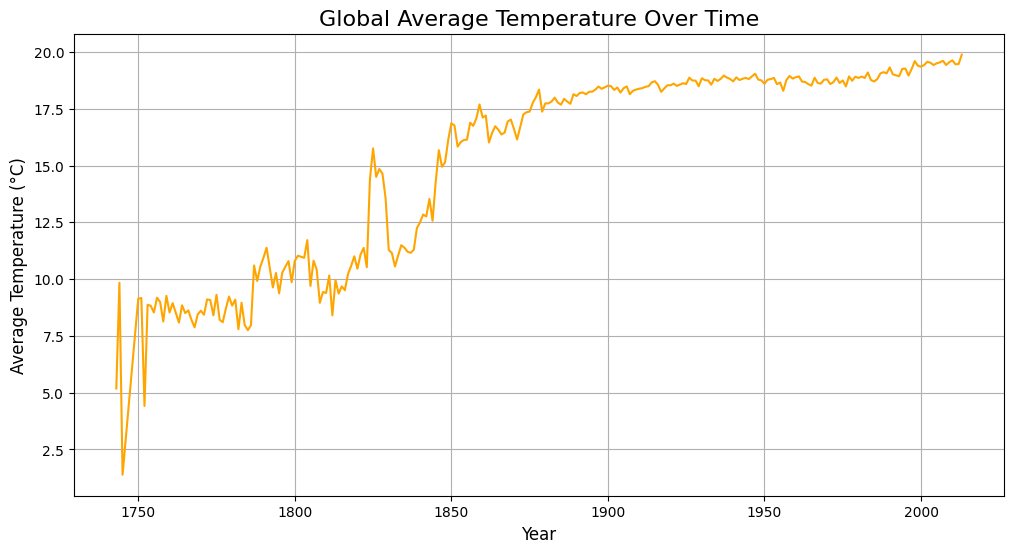

In [23]:
# Explicitly create a new column safely using .loc
temperature_data_cleaned.loc[:, 'Year'] = temperature_data_cleaned['dt'].dt.year

# Group by year and calculate the global average temperature
global_trend = temperature_data_cleaned.groupby('Year')['AverageTemperature'].mean()

# Plot global temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_trend.index, y=global_trend.values, color='orange')
plt.title('Global Average Temperature Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(True)
plt.show()


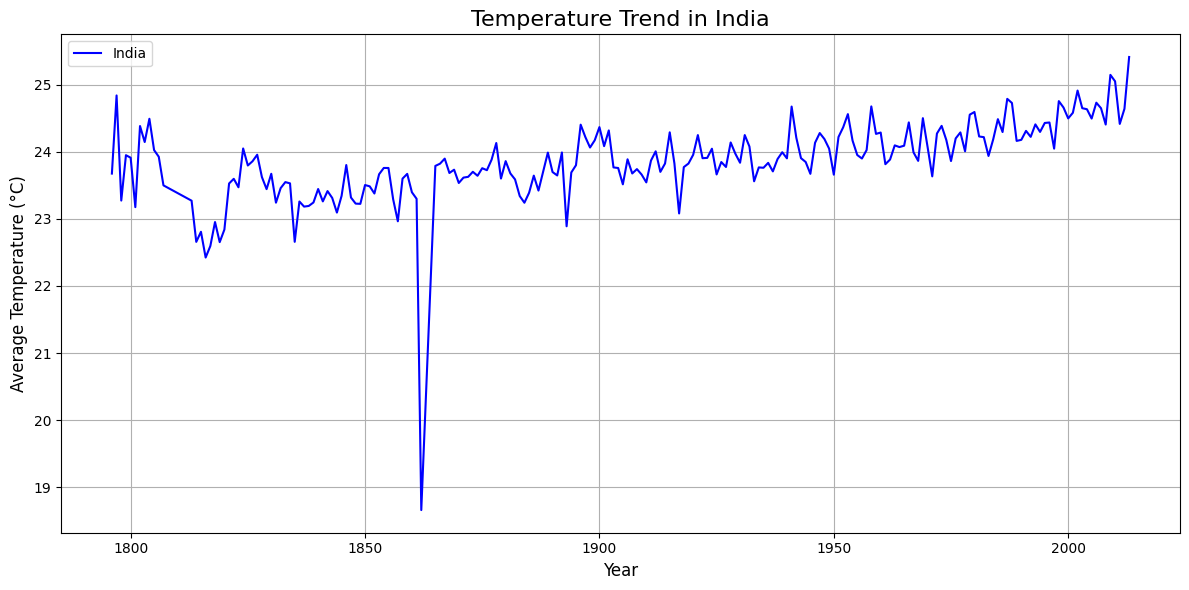

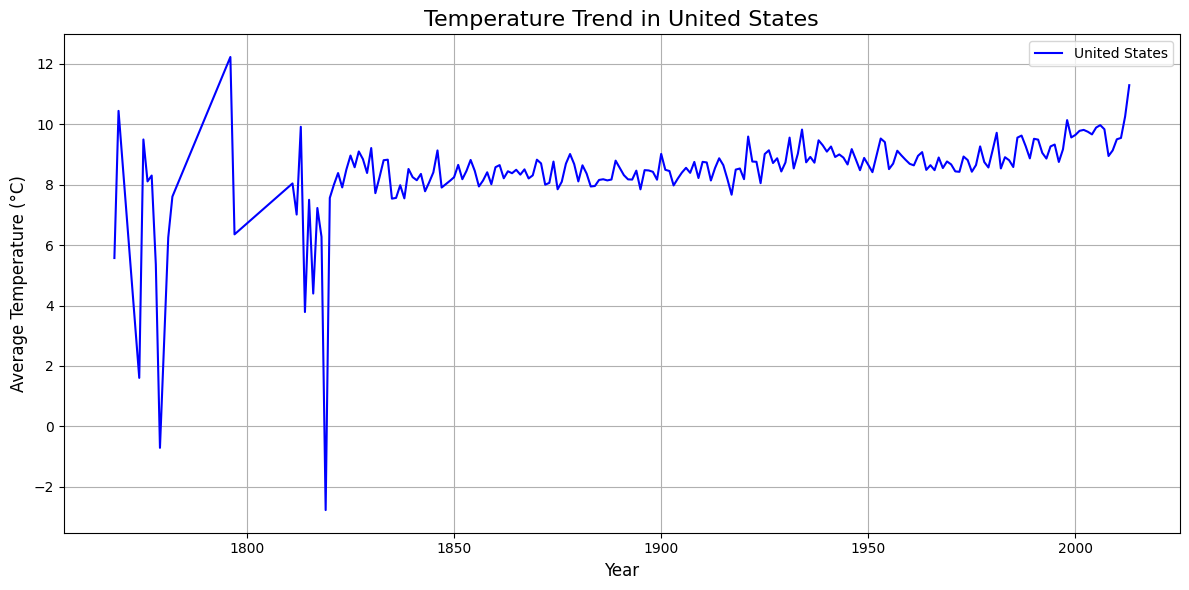

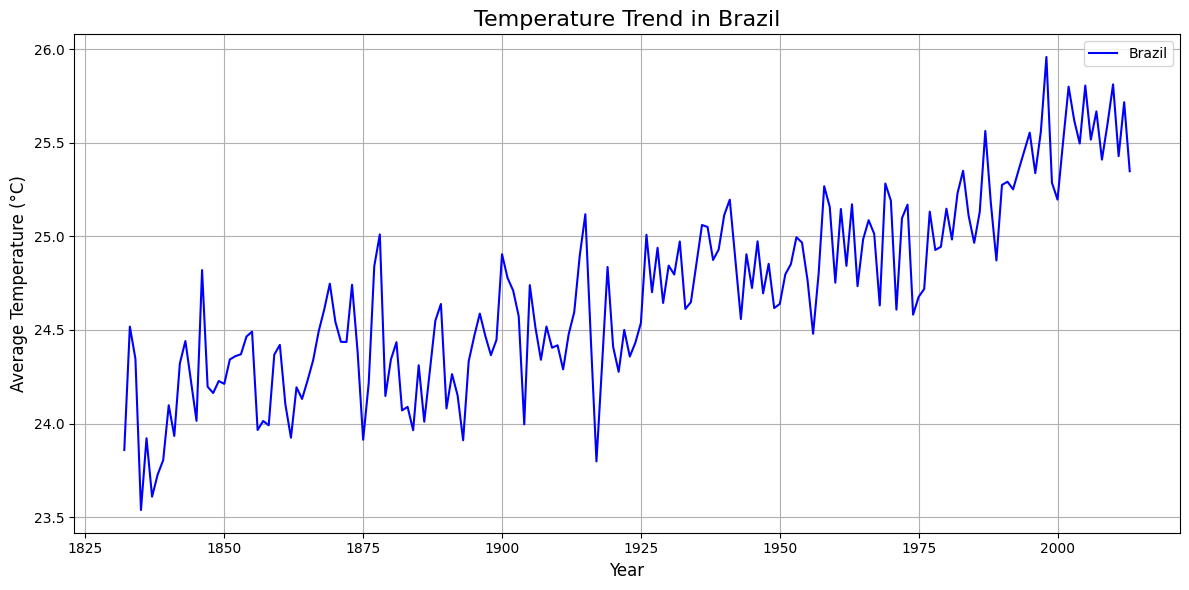

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
file_path = 'GlobalLandTemperaturesByCountry.csv'
temperature_data = pd.read_csv(file_path)

# Convert 'dt' column to datetime format
temperature_data['dt'] = pd.to_datetime(temperature_data['dt'])

# Clean the dataset by dropping rows with NaN in 'AverageTemperature'
temperature_data_cleaned = temperature_data.dropna(subset=['AverageTemperature'])

# Safely assign the Year column using .assign()
temperature_data_cleaned = temperature_data_cleaned.assign(
    Year=temperature_data_cleaned['dt'].dt.year
)

# Sample plotting function
def plot_country_trend(country_name):
    # Filter data for the selected country
    country_data = temperature_data_cleaned[temperature_data_cleaned['Country'] == country_name]
    
    # Group by year and calculate the mean temperature
    country_trend = country_data.groupby('Year')['AverageTemperature'].mean()

    # Create a plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=country_trend.index, y=country_trend.values, label=country_name, color='blue')
    plt.title(f'Temperature Trend in {country_name}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Temperature (°C)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Example usage: Plotting the temperature trend for different countries
plot_country_trend('India')  # Replace 'India' with any country name of your choice
plot_country_trend('United States')  # Example for another country
plot_country_trend('Brazil')  # And another example


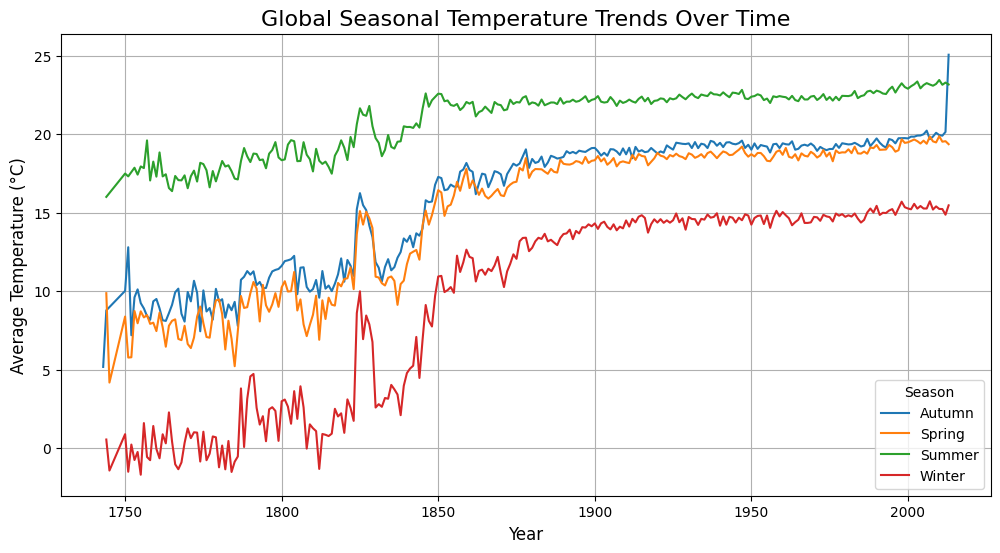

In [33]:
# Extract month and season safely using .assign()
temperature_data_cleaned = temperature_data_cleaned.assign(
    Month=temperature_data_cleaned['dt'].dt.month,
    Season=temperature_data_cleaned['dt'].dt.month.apply(
        lambda x: 'Winter' if x in [12, 1, 2] else 
                  'Spring' if x in [3, 4, 5] else 
                  'Summer' if x in [6, 7, 8] else 
                  'Autumn'
    )
)

# Global seasonal average temperatures
seasonal_data = temperature_data_cleaned.groupby(['Year', 'Season'])['AverageTemperature'].mean().reset_index()

# Plot seasonal trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_data, x='Year', y='AverageTemperature', hue='Season')
plt.title('Global Seasonal Temperature Trends Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(title='Season')
plt.grid(True)
plt.show()


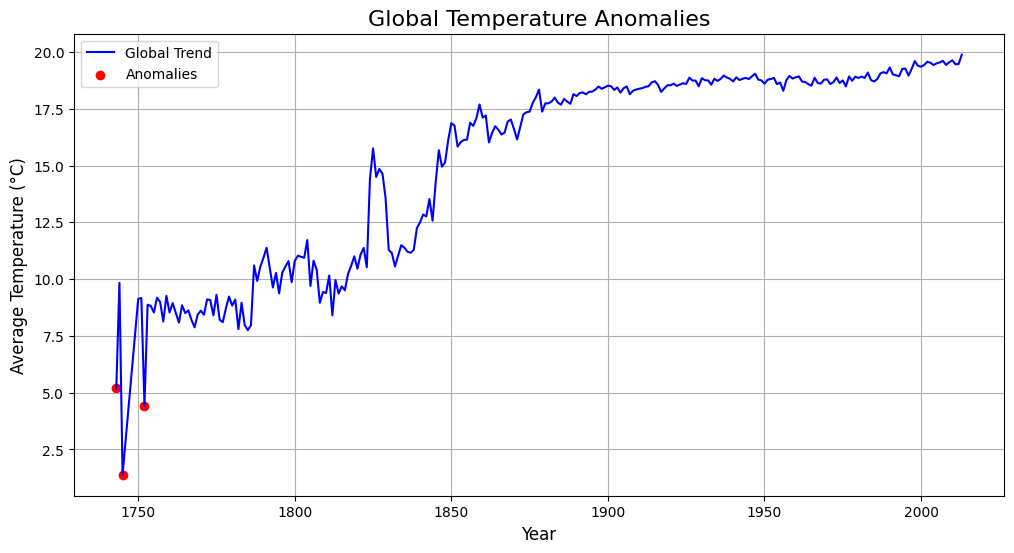

Anomaly Years:
Year
1743    5.184140
1745    1.387125
1752    4.413387
Name: AverageTemperature, dtype: float64


In [13]:
# Calculate global average temperature and standard deviation
global_avg_temp = global_trend.mean()
global_std_temp = global_trend.std()

# Identify anomalies (e.g., temperatures exceeding 2 standard deviations)
anomalies = global_trend[(global_trend - global_avg_temp).abs() > 2 * global_std_temp]

# Plot anomalies
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_trend.index, y=global_trend.values, color='blue', label='Global Trend')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')
plt.title('Global Temperature Anomalies', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Display anomaly years
print("Anomaly Years:")
print(anomalies)


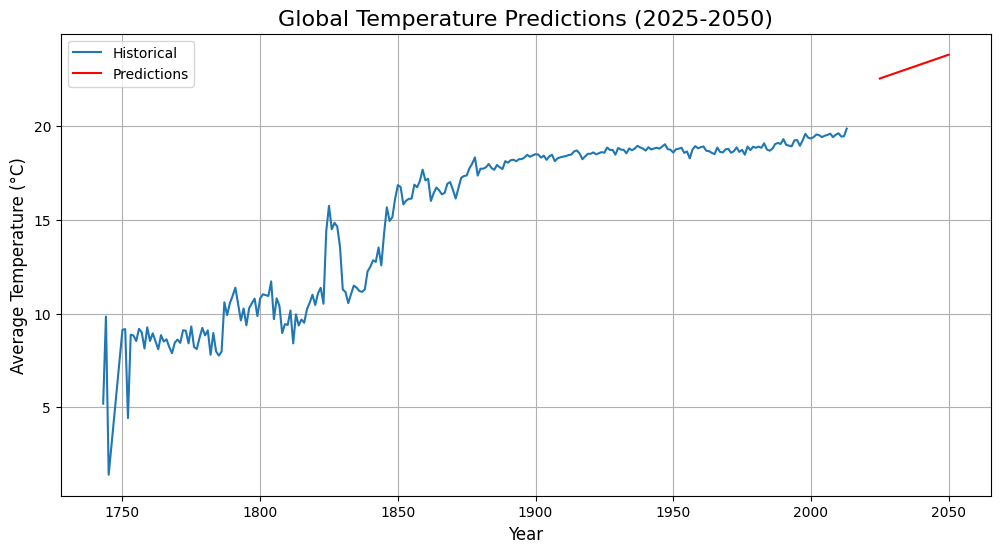

Model Mean Squared Error: 2.72


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load and preprocess the dataset
file_path = 'GlobalLandTemperaturesByCountry.csv'
temperature_data = pd.read_csv(file_path)
temperature_data['dt'] = pd.to_datetime(temperature_data['dt'])

# Create a copy to avoid SettingWithCopyWarning
temperature_data_cleaned = temperature_data.dropna(subset=['AverageTemperature']).copy()

# Safely create the 'Year' column
temperature_data_cleaned.loc[:, 'Year'] = temperature_data_cleaned['dt'].dt.year

# Calculate global average temperature over years
global_trend = temperature_data_cleaned.groupby('Year')['AverageTemperature'].mean()

# Reset index for modeling
global_trend_df = global_trend.reset_index()
global_trend_df.columns = ['Year', 'AverageTemperature']

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future temperatures
future_years = pd.DataFrame({'Year': range(2025, 2051)})
future_predictions = model.predict(future_years)

# Plot predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_trend_df['Year'], y=global_trend_df['AverageTemperature'], label='Historical')
sns.lineplot(x=future_years['Year'], y=future_predictions, color='red', label='Predictions')
plt.title('Global Temperature Predictions (2025-2050)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Mean Squared Error: {mse:.2f}")

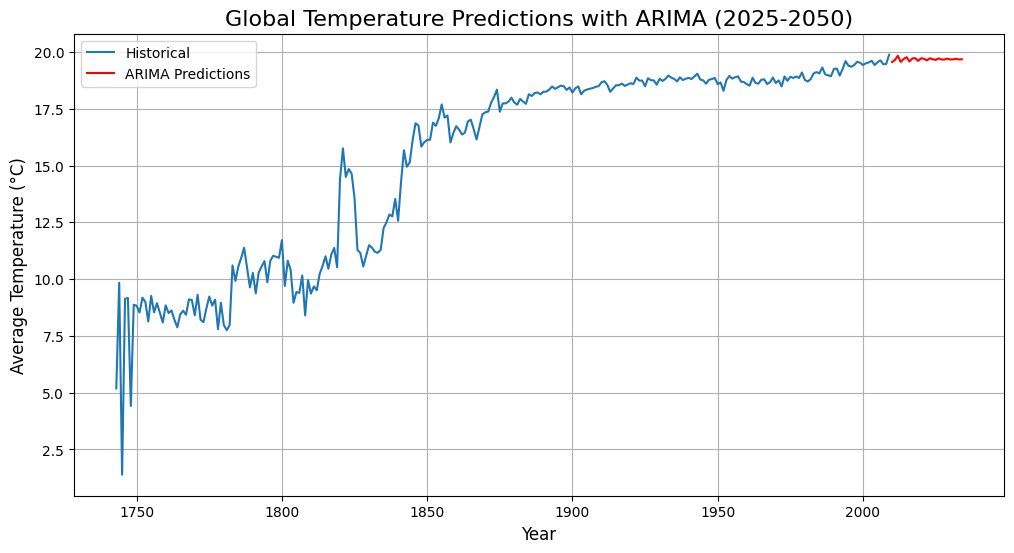

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already created the global_trend DataFrame/Series
# Convert the index to a DateTimeIndex for time series analysis
global_trend_index = pd.date_range(start=f'{global_trend.index[0]}-01-01', 
                                     periods=len(global_trend), 
                                     freq='YE')  # Updated to 'YE'
global_trend.index = global_trend_index

# Fit ARIMA model
arima_model = ARIMA(global_trend, order=(5, 1, 0))  # You can tune the order
arima_result = arima_model.fit()

# Predict future temperatures
future_arima = arima_result.get_forecast(steps=25)
future_arima_index = pd.date_range(start=global_trend.index[-1] + pd.DateOffset(years=1), 
                                     periods=25, 
                                     freq='YE')  # Updated to 'YE'
future_arima_mean = future_arima.predicted_mean

# Plot ARIMA predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_trend.index.year, y=global_trend.values, label='Historical')
sns.lineplot(x=future_arima_index.year, y=future_arima_mean, color='red', label='ARIMA Predictions')
plt.title('Global Temperature Predictions with ARIMA (2025-2050)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
